# Theoretical

Q1] Can we use Bagging for regression problems?

Yes, Bagging can be used for regression problems.

How it works: Instead of aggregating predictions via voting (as in classification), Bagging for regression averages the predictions of multiple base models (e.g., Decision Trees).

Example: A Bagging Regressor trains multiple regression models on different bootstrap samples and combines their outputs by taking the mean.

Purpose: Reduces variance and improves generalization.



2] What is the difference between multiple model training and single model training?

Single Model Training:

Uses one model (e.g., a single Decision Tree).

Prone to overfitting (high variance) or underfitting (high bias).

Multiple Model Training (Ensemble):

Combines multiple models (e.g., Random Forest = many Decision Trees).

Reduces variance (Bagging) or bias (Boosting).

More robust and generalizable.



3] Explain the concept of feature randomness in Random Forest

Feature Randomness means that each tree in a Random Forest is trained on a random subset of features (not just data points).

Why?

Prevents trees from being too similar (reduces correlation).

Ensures diversity in predictions, improving generalization.

How?

At each split, only a random subset of features (max_features parameter) is considered.

4] What is OOB (Out-of-Bag) Score?

Definition: Evaluation metric for Bagging models (like Random Forest) without needing a separate validation set.

How it works:

Since Bagging uses bootstrap sampling (~63% of data per model), the remaining ~37% (OOB samples) can be used for validation.

The OOB score is the average prediction error on these unseen samples.

Advantage: Efficient cross-validation without extra data splitting.



5] How can you measure the importance of features in a Random Forest model?

Feature Importance is calculated in two ways:

Mean Decrease in Impurity (MDI):

Measures how much a feature reduces impurity (Gini/entropy for classification, variance for regression) across all trees.

Permutation Importance:

Shuffles a feature’s values and measures the drop in model accuracy.

Output: A score per feature (higher = more important).

6] Explain the working principle of a Bagging Classifier

Bootstrap Sampling: Creates multiple datasets by randomly sampling with replacement.

Parallel Training: Trains a base classifier (e.g., Decision Tree) on each sample.

Aggregation (Voting): For prediction, combines outputs via majority voting (classification) or averaging (regression).

Goal: Reduces variance and overfitting.



7] How do you evaluate a Bagging Classifier’s performance?

Metrics:

Accuracy, Precision, Recall, F1-Score (for classification).

Confusion Matrix (for class-wise performance).

OOB Score (if available).

Cross-Validation: K-fold CV to ensure robustness.

8] How does a Bagging Regressor work?

Bootstrap Sampling: Creates multiple subsets of training data.

Model Training: Fits a base regressor (e.g., Decision Tree) on each subset.

Prediction Aggregation: Averages predictions from all models.

Effect: Reduces variance, improves stability.

9] What is the main advantage of ensemble techniques?

Improved Accuracy & Robustness:

Combines weak learners to form a strong learner.

Reduces variance (Bagging) or bias (Boosting).

Less prone to overfitting than single models.



10] What is the main challenge of ensemble methods?
Computational Cost:

Training multiple models increases time and memory usage.

Complexity:

Harder to interpret than single models (e.g., a single Decision Tree).



11] Explain the key idea behind ensemble techniques?
"Wisdom of Crowds": Combining multiple models leads to better performance than any single model.

Types:

Bagging: Parallel training, reduces variance (e.g., Random Forest).

Boosting: Sequential training, reduces bias (e.g., AdaBoost).

Stacking: Combines models via meta-learner.

12] What is a Random Forest Classifier?
Definition: An ensemble of Decision Trees using Bagging + Feature Randomness.

How it works:

Each tree is trained on a random data subset (bootstrap).

Each split considers a random feature subset.

Output: Majority vote (classification) or average (regression).

13] What are the main types of ensemble techniques?

Bagging (Parallel, reduces variance) → Random Forest.

Boosting (Sequential, reduces bias) → AdaBoost, Gradient Boosting.

Stacking (Meta-model combines predictions).

14] What is ensemble learning in machine learning?

Definition: Combining multiple models to improve performance.

Why? Single models may have high bias/variance; ensembles balance errors.

15] When should we avoid using ensemble methods?

When:

Data is very small (ensembles need sufficient samples).

Interpretability is critical (single Decision Tree is simpler).

Low computational resources (ensembles are expensive).

16] How does Bagging help in reducing overfitting?

Averaging Effect: Multiple models cancel out individual errors.

Diversity: Bootstrap sampling ensures different subsets, reducing reliance on noise.



17] Why is Random Forest better than a single Decision Tree?

Less Overfitting: Aggregating trees reduces variance.

Feature Importance: Provides insights into key features.

Robustness: Handles noise and outliers better.



18] What is the role of bootstrap sampling in Bagging?

Creates Diversity: Each model sees a different data subset.

Enables OOB Evaluation: Unseen samples act as validation.



19] What are some real-world applications of ensemble techniques?

Finance: Credit scoring (Random Forest).

Healthcare: Disease prediction (XGBoost).

Marketing: Customer churn (AdaBoost).

20] What is the difference between Bagging and Boosting?

Bagging and Boosting are both ensemble learning techniques in machine learning that combine the predictions of multiple base models to improve accuracy and reduce variance or bias. However, they differ significantly in how they build and combine models.

How They Work

Bagging (e.g., Random Forest)

Process:

Create multiple bootstrap samples (random sampling with replacement).

Train an independent model on each sample.

Combine predictions (majority vote for classification, average for regression).

Models are trained independently.

Focus: Reduce overfitting by averaging.

Boosting (e.g., AdaBoost, Gradient Boosting, XGBoost)

Process:

Train the first model on the dataset.

Evaluate errors and give more weight to misclassified samples.

Train the next model focusing more on previous errors.

Repeat and combine all models with weights.

Models are trained sequentially.

Focus: Reduce bias by correcting mistakes step by step.


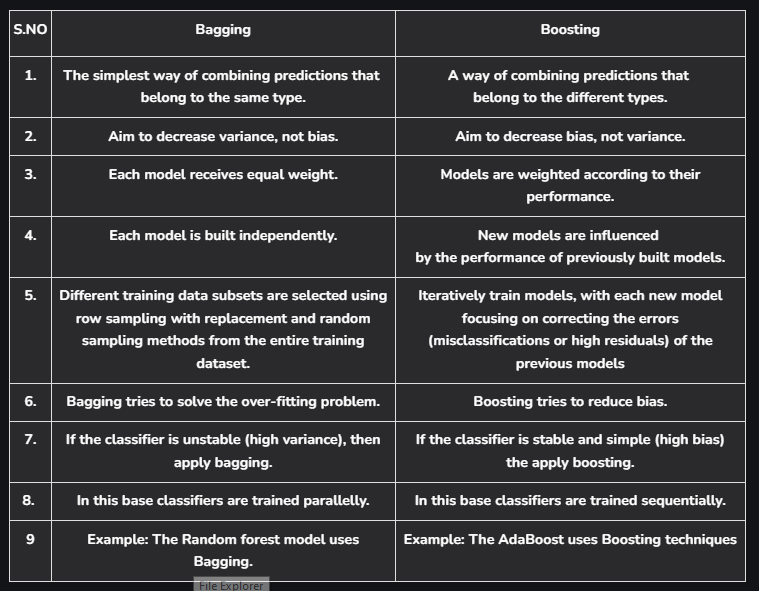



# Practical

In [2]:
#21] Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 1.0000


In [5]:
# 22] Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bagging_reg.fit(X_train, y_train)

y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse:.4f}")

Bagging Regressor MSE: 2987.0074


In [7]:
# 23] Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
features = data.feature_names

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance Scores:")
print(importance)

Feature Importance Scores:
                    Feature  Importance
23               worst area    0.139357
27     worst concave points    0.132225
7       mean concave points    0.107046
20             worst radius    0.082848
22          worst perimeter    0.080850
2            mean perimeter    0.067990
6            mean concavity    0.066917
3                 mean area    0.060462
26          worst concavity    0.037339
0               mean radius    0.034843
13               area error    0.029553
25        worst compactness    0.019864
21            worst texture    0.017485
1              mean texture    0.015225
10             radius error    0.014264
24         worst smoothness    0.012232
5          mean compactness    0.011597
12          perimeter error    0.010085
28           worst symmetry    0.008179
4           mean smoothness    0.007958
19  fractal dimension error    0.005942
16          concavity error    0.005820
15        compactness error    0.005612
14         sm

In [8]:
# 24] Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))


dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))

print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Single Decision Tree MSE: {dt_mse:.4f}")

Random Forest MSE: 2859.6420
Single Decision Tree MSE: 5697.7895


In [9]:
#25] Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X, y = data.data, data.target

rf_clf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42
)
rf_clf.fit(X, y)

print(f"OOB Score: {rf_clf.oob_score_:.4f}")

OOB Score: 0.9533


In [11]:
# 26] Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_svm = BaggingClassifier(
    estimator=SVC(probability=True),
    n_estimators=50,
    random_state=42
)
bagging_svm.fit(X_train, y_train)

y_pred = bagging_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging (SVM) Accuracy: {accuracy:.4f}")

Bagging (SVM) Accuracy: 1.0000


In [13]:
# 27] Train a Random Forest Classifier with different numbers of trees and compare accuracy

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_trees = [1, 5, 10, 50, 100]
accuracies = []

for n in n_trees:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators={n}, Accuracy={acc:.4f}")


n_estimators=1, Accuracy=1.0000
n_estimators=5, Accuracy=1.0000
n_estimators=10, Accuracy=1.0000
n_estimators=50, Accuracy=1.0000
n_estimators=100, Accuracy=1.0000


In [15]:
# 28] Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_model = LogisticRegression(solver='liblinear')
bagging = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_proba = bagging.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score = {auc_score:.4f}")


AUC Score = 0.9143


In [17]:
# 29] Train a Random Forest Regressor and analyze feature importance scores

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import pandas as pd

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
features = fetch_california_housing().feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


In [18]:
# 30] Train an ensemble model using both Bagging and Random Forest and compare accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

bagging_acc = bagging_model.score(X_test, y_test)
rf_acc = rf_model.score(X_test, y_test)

print(f"Bagging Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Bagging Accuracy: 0.8700
Random Forest Accuracy: 0.8500


In [19]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
Accuracy: 1.0


In [21]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

for n in [10, 50, 100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"Estimators: {n}, MSE: {mse:.2f}")


Estimators: 10, MSE: 3256.96
Estimators: 50, MSE: 3056.49
Estimators: 100, MSE: 2970.86


In [22]:
# 33. Train a Random Forest Classifier and analyze misclassified samples

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(f"Index: {i}, Actual: {y_test[i]}, Predicted: {y_pred[i]}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [24]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree.predict(X_test))

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag.predict(X_test))

print("Decision Tree Accuracy:", tree_acc)
print("Bagging Classifier Accuracy:", bag_acc)


Decision Tree Accuracy: 1.0
Bagging Classifier Accuracy: 1.0


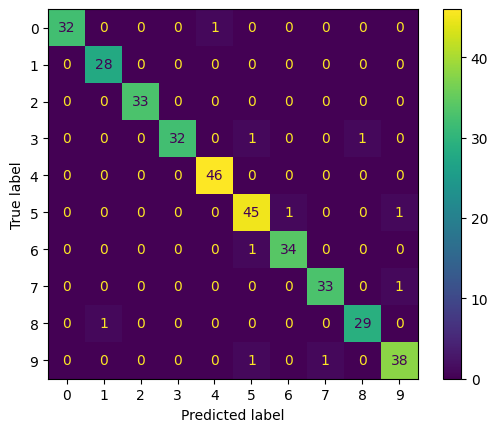

In [25]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [26]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]
stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))



Stacking Classifier Accuracy: 1.0


In [27]:
# 37. Train a Random Forest Classifier and print the top 5 most important features

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[-5:][::-1]

print("Top 5 Feature Importances:")
for i in indices:
    print(data.feature_names[i], ":", importances[i])



Top 5 Feature Importances:
worst area : 0.15389236463205394
worst concave points : 0.14466326620735528
mean concave points : 0.10620998844591638
worst radius : 0.07798687515738047
mean concavity : 0.06800084191430111


In [29]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.datasets import load_wine
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9777777777777779
Recall: 0.9583333333333334
F1 Score: 0.9662835249042147


In [30]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

for depth in [2, 4, 6, 8, None]:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Max Depth: {depth}, Accuracy: {acc:.2f}")


Max Depth: 2, Accuracy: 1.00
Max Depth: 4, Accuracy: 1.00
Max Depth: 6, Accuracy: 1.00
Max Depth: 8, Accuracy: 1.00
Max Depth: None, Accuracy: 1.00


In [32]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

models = {
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

for name, base in models.items():
    model = BaggingRegressor(estimator=base, n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} MSE: {mse:.2f}")



DecisionTree MSE: 3056.49
KNeighbors MSE: 2918.78


In [33]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9952505732066819


In [35]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

data = load_iris()
X = data.data
y = data.target

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9666666666666668


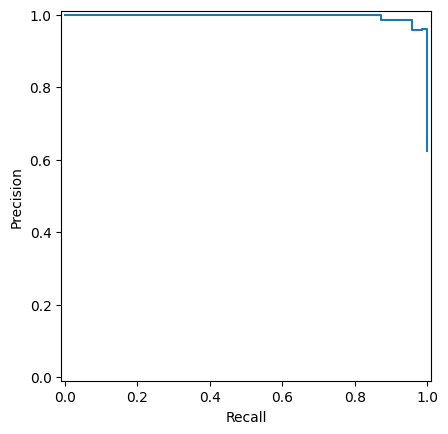

In [36]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()


In [37]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))


Stacking Classifier Accuracy: 1.0


In [40]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

for bootstrap in [True, False]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"Bootstrap: {bootstrap}, MSE: {mse:.2f}")


Bootstrap: True, MSE: 3056.49
Bootstrap: False, MSE: 4542.15
